<a href="https://colab.research.google.com/github/anmolsabharwal/RedDevils/blob/master/RD_Full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [151]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sqlite3
from google.colab import drive
import datetime
import plotly.figure_factory as ff


drive.mount('/content/drive')
%matplotlib inline

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [152]:
gws = sqlite3.connect('/content/drive/My Drive/fpl.db')
gws = pd.read_sql_query("SELECT * FROM gw",gws)
#gws1=pd.read_csv(io.StringIO(uploaded['gws.csv'].decode('utf-8')),sep=',')
gws.head()

,name,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,opponent_team,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards
0,Aaron_Cresswell,0,0,0,0,0,454,10,0,0,0,0,2016-08-15T19:00:00Z,0,4,0,0,0,0,1,0,14023,1,2,0,0,0,0,0,55,FALSE,0
1,Aaron_Lennon,0,0,6,0,0.3,142,3,0,0,0.9,8.2,2016-08-13T14:00:00Z,15,17,0,0,0,0,1,0,13918,1,1,0,1,0,0,0,60,TRUE,0
2,Aaron_Ramsey,0,0,5,0,4.9,16,8,3,0,3,2.2,2016-08-14T15:00:00Z,60,9,0,0,0,0,1,0,163170,4,3,23,2,0,0,0,80,TRUE,0
3,Abdoulaye_Doucour�,0,0,0,0,0,482,7,0,0,0,0,2016-08-13T14:00:00Z,0,13,0,0,0,0,1,0,1051,1,1,0,0,0,0,0,50,FALSE,0
4,Abdul Rahman_Baba,0,0,0,0,0,80,10,0,0,0,0,2016-08-15T19:00:00Z,0,20,0,0,0,0,1,0,1243,1,2,0,0,0,0,0,55,TRUE,0


In [153]:
gws.columns

Index(['name', 'assists', 'bonus', 'bps', 'clean_sheets', 'creativity',
       'element', 'fixture', 'goals_conceded', 'goals_scored', 'ict_index',
       'influence', 'kickoff_time', 'minutes', 'opponent_team', 'own_goals',
       'penalties_missed', 'penalties_saved', 'red_cards', 'round', 'saves',
       'selected', 'team_a_score', 'team_h_score', 'threat', 'total_points',
       'transfers_balance', 'transfers_in', 'transfers_out', 'value',
       'was_home', 'yellow_cards'],
      dtype='object')

In [154]:
gws=gws.astype({'name':'category','assists':int, 'bonus':int, 'bps':int, 'clean_sheets':'category',
       'creativity':float,'element':int,'goals_conceded':int,
       'goals_scored':int, 'ict_index':float, 'influence':float,'minutes':int, 'opponent_team':int, 'own_goals':int,'penalties_missed':int, 'penalties_saved':int,
       'red_cards':int, 'round':int, 'saves':int, 'selected':int,
        'team_a_score':int, 'team_h_score':int,'threat':float,
       'total_points':int, 'transfers_balance':int, 'transfers_in':int, 'transfers_out':int,
       'value':int, 'yellow_cards':int})

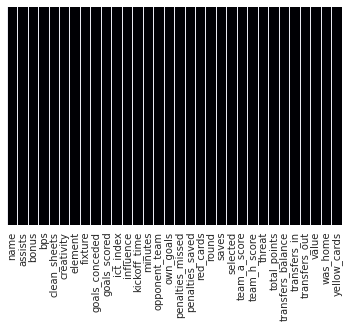

In [155]:
sns.set_style('dark')
sns.heatmap(gws.isnull(),yticklabels=False,cbar=False,cmap='inferno')

In [156]:
gws = gws.assign(id=(gws['name']).astype('category').cat.codes)


In [157]:
def fd(x):
  x=int(x)
  if x<=6:
    return '3'
  elif x>6 and x<=14:
    return '1'
  else:
    return '2'

In [158]:
gws.rename(columns={'opponent_team':'fdr'},inplace=True)


In [159]:
gws['fdr']=gws['fdr'].apply(fd).astype(float)


In [160]:
gws['kickoff_time']=pd.to_datetime(gws['kickoff_time'])

In [161]:
gws['kickoff_time'] = gws.kickoff_time.dt.hour


In [162]:
def time(x):
  x=int(x)
  if x>8 and x<=12:
    return '0'
  elif x>12 and x<=18:
    return '1'
  else:
    return '2'

In [163]:
gws['kickoff_time']=gws['kickoff_time'].apply(time).astype(float)
gws.head(20)

,name,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,fdr,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,id
0,Aaron_Cresswell,0,0,0,0,0.0,454,10,0,0,0.0,0.0,2.0,0,3.0,0,0,0,0,1,0,14023,1,2,0.0,0,0,0,0,55,FALSE,0,1
1,Aaron_Lennon,0,0,6,0,0.3,142,3,0,0,0.9,8.2,1.0,15,2.0,0,0,0,0,1,0,13918,1,1,0.0,1,0,0,0,60,TRUE,0,4
2,Aaron_Ramsey,0,0,5,0,4.9,16,8,3,0,3.0,2.2,1.0,60,1.0,0,0,0,0,1,0,163170,4,3,23.0,2,0,0,0,80,TRUE,0,12
3,Abdoulaye_Doucour�,0,0,0,0,0.0,482,7,0,0,0.0,0.0,1.0,0,1.0,0,0,0,0,1,0,1051,1,1,0.0,0,0,0,0,50,FALSE,0,23
4,Abdul Rahman_Baba,0,0,0,0,0.0,80,10,0,0,0.0,0.0,2.0,0,2.0,0,0,0,0,1,0,1243,1,2,0.0,0,0,0,0,55,TRUE,0,25
5,Abel_Hern�ndez,1,0,10,0,12.2,163,4,1,0,5.7,14.4,0.0,90,1.0,0,0,0,0,1,0,26039,1,2,30.0,5,0,0,0,60,TRUE,0,26
6,Adama_Diomande,0,2,29,0,16.8,164,4,1,1,10.7,45.2,0.0,90,1.0,0,0,0,0,1,0,38151,1,2,45.0,8,0,0,0,45,TRUE,0,46
7,Adam_Clayton,0,0,6,0,2.2,283,6,1,0,1.4,3.2,1.0,90,1.0,0,0,0,0,1,0,17663,1,1,9.0,2,0,0,0,45,TRUE,0,29
8,Adam_Federici,0,0,0,0,0.0,30,9,0,0,0.0,0.0,0.0,0,1.0,0,0,0,0,1,0,4315,3,1,0.0,0,0,0,0,45,TRUE,0,30
9,Adam_Forshaw,0,0,3,0,1.3,286,6,1,0,0.3,2.0,1.0,69,1.0,0,0,0,0,1,0,2723,1,1,0.0,1,0,0,0,45,TRUE,1,31


In [164]:
def was_home(x):
  if x=="FALSE":
    #print('Away')
    return str('Away')
  else:
    #print('Home')
    return str('Home')

In [165]:
gws['home']=gws['was_home'].apply(was_home)

In [166]:
gws.drop(['element','fixture','round','transfers_balance','transfers_in','transfers_out','team_a_score','was_home',	'team_h_score','round'],axis=1, inplace=True)

In [167]:
gws.head(50)

,name,assists,bonus,bps,clean_sheets,creativity,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,fdr,own_goals,penalties_missed,penalties_saved,red_cards,saves,selected,threat,total_points,value,yellow_cards,id,home
0,Aaron_Cresswell,0,0,0,0,0.0,0,0,0.0,0.0,2.0,0,3.0,0,0,0,0,0,14023,0.0,0,55,0,1,Away
1,Aaron_Lennon,0,0,6,0,0.3,0,0,0.9,8.2,1.0,15,2.0,0,0,0,0,0,13918,0.0,1,60,0,4,Home
2,Aaron_Ramsey,0,0,5,0,4.9,3,0,3.0,2.2,1.0,60,1.0,0,0,0,0,0,163170,23.0,2,80,0,12,Home
3,Abdoulaye_Doucour�,0,0,0,0,0.0,0,0,0.0,0.0,1.0,0,1.0,0,0,0,0,0,1051,0.0,0,50,0,23,Away
4,Abdul Rahman_Baba,0,0,0,0,0.0,0,0,0.0,0.0,2.0,0,2.0,0,0,0,0,0,1243,0.0,0,55,0,25,Home
5,Abel_Hern�ndez,1,0,10,0,12.2,1,0,5.7,14.4,0.0,90,1.0,0,0,0,0,0,26039,30.0,5,60,0,26,Home
6,Adama_Diomande,0,2,29,0,16.8,1,1,10.7,45.2,0.0,90,1.0,0,0,0,0,0,38151,45.0,8,45,0,46,Home
7,Adam_Clayton,0,0,6,0,2.2,1,0,1.4,3.2,1.0,90,1.0,0,0,0,0,0,17663,9.0,2,45,0,29,Home
8,Adam_Federici,0,0,0,0,0.0,0,0,0.0,0.0,0.0,0,1.0,0,0,0,0,0,4315,0.0,0,45,0,30,Home
9,Adam_Forshaw,0,0,3,0,1.3,1,0,0.3,2.0,1.0,69,1.0,0,0,0,0,0,2723,0.0,1,45,1,31,Home


In [168]:
gws['value']=gws['value']*0.1
gws1=gws.copy()


In [169]:
gws1['Last_Week_Points'] = gws1.groupby(['id'])['total_points'].shift().astype(float)
gws1['Last_2_Week_Points'] = gws1.groupby(['id'])['total_points'].shift(2).astype(float)
#gws1['Last_3_Week_Points'] = gws1.groupby(['id'])['total_points'].shift(3).astype(float)
#gws1['Last_4_Week_Points'] = gws1.groupby(['id'])['total_points'].shift(4).astype(float)



gws1['Last_Week_Goals'] = gws1.groupby(['id'])['goals_scored'].shift().astype(float)
gws1['Last_2_Week_Goals'] = gws1.groupby(['id'])['goals_scored'].shift(2).astype(float)
#gws1['Last_3_Week_Goals'] = gws1.groupby(['id'])['goals_scored'].shift(3).astype(float)


gws1['Last_Week_ICT'] = gws1.groupby(['id'])['ict_index'].shift().astype(float)
gws1['Last_2_Week_ICT'] = gws1.groupby(['id'])['ict_index'].shift(2).astype(float)
# #gws1['Last_3_Week_ICT'] = gws1.groupby(['id'])['ict_index'].shift(3).astype(float)


gws1['Last_Week_BPS'] = gws1.groupby(['id'])['bps'].shift().astype(float)
gws1['Last_2_Week_BPS'] = gws1.groupby(['id'])['bps'].shift(2).astype(float)
#gws1['Last_3_Week_BPS'] = gws1.groupby(['id'])['bps'].shift(3).astype(float)


gws1['Last_Week_Assists'] = gws1.groupby(['id'])['assists'].shift().astype(float)
gws1['Last_2_Week_Assists'] = gws1.groupby(['id'])['assists'].shift(2).astype(float)
#gws1['Last_3_Week_Assists'] = gws1.groupby(['id'])['assists'].shift(3).astype(float)


gws1['Last_Week_Bonus'] = gws1.groupby(['id'])['bonus'].shift().astype(float)
gws1['Last_2_Week_Bonus'] = gws1.groupby(['id'])['bonus'].shift(2).astype(float)
#gws1['Last_3_Week_Bonus'] = gws1.groupby(['id'])['bonus'].shift(3).astype(float)


gws1['Last_Week_Influence'] = gws1.groupby(['id'])['influence'].shift().astype(float)
gws1['Last_2_Week_Influence'] = gws1.groupby(['id'])['influence'].shift(2).astype(float)
#gws1['Last_3_Week_Influence'] = gws1.groupby(['id'])['influence'].shift(3).astype(float)


gws1['Last_Week_Minutes_Played'] = gws1.groupby(['id'])['minutes'].shift().astype(float)
gws1['Last_2_Week_Minutes_Played'] = gws1.groupby(['id'])['minutes'].shift(2).astype(float)
#gws1['Last_3_Week_Minutes_Played'] = gws1.groupby(['id'])['minutes'].shift(3).astype(float)


gws1['Last_Week_Threat'] = gws1.groupby(['id'])['threat'].shift().astype(float)
gws1['Last_2_Week_Threat'] = gws1.groupby(['id'])['threat'].shift(2).astype(float)
# #gws1['Last_3_Week_Threat'] = gws1.groupby(['id'])['threat'].shift(3).astype(float)


gws1['Last_Week_Selected'] = gws1.groupby(['id'])['selected'].shift().astype(float)
gws1['Last_2_Week_Selected'] = gws1.groupby(['id'])['selected'].shift(2).astype(float)
#gws1['Last_3_Week_Selected'] = gws1.groupby(['id'])['selected'].shift(3).astype(float)


gws1['Last_Week_Value'] = gws1.groupby(['id'])['value'].shift().astype(float)
gws1['Last_2_Week_Value'] = gws1.groupby(['id'])['value'].shift(2).astype(float)
# gws1['Last_3_Week_Value'] = gws1.groupby(['id'])['value'].shift(3).astype(float)


gws1['Last_Week_Creativity'] = gws1.groupby(['id'])['creativity'].shift().astype(float)
gws1['Last_2_Week_Creativity'] = gws1.groupby(['id'])['creativity'].shift(2).astype(float)
# #gws1['Last_3_Week_Creativity'] = gws1.groupby(['id'])['creativity'].shift(3).astype(float)



gws1['Last_Week_FDR'] = gws1.groupby(['id'])['fdr'].shift().astype(float).astype(float)
gws1['Last_2_Week_FDR'] = gws1.groupby(['id'])['fdr'].shift(2).astype(float).astype(float)
gws1['Last_3_Week_FDR'] = gws1.groupby(['id'])['fdr'].shift(3).astype(float).astype(float)


gws1['Last_Week_Clean_Sheets'] = gws1.groupby(['id'])['clean_sheets'].shift().astype(float)
gws1['Last_2_Week_Clean_Sheets'] = gws1.groupby(['id'])['clean_sheets'].shift(2).astype(float)
#gws1['Last_3_Week_Clean_Sheets'] = gws1.groupby(['id'])['clean_sheets'].shift(3).astype(float)


gws1['Last_Week_Goals_Conceded'] = gws1.groupby(['id'])['goals_conceded'].shift().astype(float)
gws1['Last_2_Week_Goals_Conceded'] = gws1.groupby(['id'])['goals_conceded'].shift(2).astype(float)
#gws1['Last_3_Week_Goals_Conceded'] = gws1.groupby(['id'])['goals_conceded'].shift(3).astype(float)


# gws1['Last_Week_Kickoff_Time'] = gws1.groupby(['id'])['kickoff_time'].shift().astype(float)
# gws1['Last_2_Week_Kickoff_Time'] = gws1.groupby(['id'])['kickoff_time'].shift(2).astype(float)
# gws1['Last_3_Week_Kickoff_Time'] = gws1.groupby(['id'])['kickoff_time'].shift(3).astype(float)


gws1['Last_Week_Own_Goals'] = gws1.groupby(['id'])['own_goals'].shift().astype(float)
gws1['Last_2_Week_Own_Goals'] = gws1.groupby(['id'])['own_goals'].shift(2).astype(float)
# gws1['Last_3_Week_Own_Goals'] = gws1.groupby(['id'])['own_goals'].shift(3).astype(float)


gws1['Last_Week_Penalties_Missed'] = gws1.groupby(['id'])['penalties_missed'].shift().astype(float)
gws1['Last_2_Week_Penalties_Missed'] = gws1.groupby(['id'])['penalties_missed'].shift(2).astype(float)
# gws1['Last_3_Week_Penalties_Saved'] = gws1.groupby(['id'])['penalties_saved'].shift(3).astype(float)


gws1['Last_Week_Red_Cards'] = gws1.groupby(['id'])['red_cards'].shift().astype(float)
gws1['Last_2_Week_Red_Cards'] = gws1.groupby(['id'])['red_cards'].shift(2).astype(float)
# gws1['Last_3_Week_Red_Cards'] = gws1.groupby(['id'])['red_cards'].shift(3).astype(float)


gws1['Last_Week_Saves'] = gws1.groupby(['id'])['saves'].shift()
gws1['Last_2_Week_Saves'] = gws1.groupby(['id'])['saves'].shift(2)
#gws1['Last_3_Week_Saves'] = gws1.groupby(['id'])['saves'].shift(3)


gws1['Last_Week_Yellow_Cards'] = gws1.groupby(['id'])['yellow_cards'].shift()
gws1['Last_2_Week_Yellow_Cards'] = gws1.groupby(['id'])['yellow_cards'].shift(2)
# gws1['Last_3_Week_Yellow_Cards'] = gws1.groupby(['id'])['yellow_cards'].shift(3)


# gws1['Last_Week_Home'] = gws1.groupby(['id'])['home'].shift()
# gws1['Last_2_Week_Home'] = gws1.groupby(['id'])['home'].shift(2)
# gws1['Last_3_Week_Home'] = gws1.groupby(['id'])['home'].shift(3)


gws1.head(100)

,name,assists,bonus,bps,clean_sheets,creativity,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,fdr,own_goals,penalties_missed,penalties_saved,red_cards,saves,selected,threat,total_points,value,yellow_cards,id,home,Last_Week_Points,Last_2_Week_Points,Last_Week_Goals,Last_2_Week_Goals,Last_Week_ICT,Last_2_Week_ICT,Last_Week_BPS,Last_2_Week_BPS,Last_Week_Assists,Last_2_Week_Assists,Last_Week_Bonus,Last_2_Week_Bonus,Last_Week_Influence,Last_2_Week_Influence,Last_Week_Minutes_Played,Last_2_Week_Minutes_Played,Last_Week_Threat,Last_2_Week_Threat,Last_Week_Selected,Last_2_Week_Selected,Last_Week_Value,Last_2_Week_Value,Last_Week_Creativity,Last_2_Week_Creativity,Last_Week_FDR,Last_2_Week_FDR,Last_3_Week_FDR,Last_Week_Clean_Sheets,Last_2_Week_Clean_Sheets,Last_Week_Goals_Conceded,Last_2_Week_Goals_Conceded,Last_Week_Own_Goals,Last_2_Week_Own_Goals,Last_Week_Penalties_Missed,Last_2_Week_Penalties_Missed,Last_Week_Red_Cards,Last_2_Week_Red_Cards,Last_Week_Saves,Last_2_Week_Saves,Last_Week_Yellow_Cards,Last_2_Week_Yellow_Cards
0,Aaron_Cresswell,0,0,0,0,0.0,0,0,0.0,0.0,2.0,0,3.0,0,0,0,0,0,14023,0.0,0,5.5,0,1,Away,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aaron_Lennon,0,0,6,0,0.3,0,0,0.9,8.2,1.0,15,2.0,0,0,0,0,0,13918,0.0,1,6.0,0,4,Home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Aaron_Ramsey,0,0,5,0,4.9,3,0,3.0,2.2,1.0,60,1.0,0,0,0,0,0,163170,23.0,2,8.0,0,12,Home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Abdoulaye_Doucour�,0,0,0,0,0.0,0,0,0.0,0.0,1.0,0,1.0,0,0,0,0,0,1051,0.0,0,5.0,0,23,Away,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Abdul Rahman_Baba,0,0,0,0,0.0,0,0,0.0,0.0,2.0,0,2.0,0,0,0,0,0,1243,0.0,0,5.5,0,25,Home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Abel_Hern�ndez,1,0,10,0,12.2,1,0,5.7,14.4,0.0,90,1.0,0,0,0,0,0,26039,30.0,5,6.0,0,26,Home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Adama_Diomande,0,2,29,0,16.8,1,1,10.7,45.2,0.0,90,1.0,0,0,0,0,0,38151,45.0,8,4.5,0,46,Home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Adam_Clayton,0,0,6,0,2.2,1,0,1.4,3.2,1.0,90,1.0,0,0,0,0,0,17663,9.0,2,4.5,0,29,Home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Adam_Federici,0,0,0,0,0.0,0,0,0.0,0.0,0.0,0,1.0,0,0,0,0,0,4315,0.0,0,4.5,0,30,Home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Adam_Forshaw,0,0,3,0,1.3,1,0,0.3,2.0,1.0,69,1.0,0,0,0,0,0,2723,0.0,1,4.5,1,31,Home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [170]:
# gws1['Last_Week_Diff_Points'] = gws1.groupby(['id'])['Last_Week_Points'].diff().astype(float)
# gws1['Last_2_Week_Diff_Points'] = gws1.groupby(['id'])['Last_2_Week_Points'].diff().astype(float)
# # #gws1['Last_3_Week_Diff_Points'] = gws1.groupby(['id'])['Last_3_Week_Points'].diff().astype(float)






# gws1['Last_Week_Diff_Goals'] = gws1.groupby(['id'])['Last_Week_Goals'].diff().astype(float)
# gws1['Last_2_Week_Diff_Goals'] = gws1.groupby(['id'])['Last_2_Week_Goals'].diff().astype(float)
# # # gws1['Last_3_Week_Diff_Goals'] = gws1.groupby(['id'])['Last_3_Week_Goals'].diff().astype(float)





# gws1['Last_Week_Diff_BPS'] = gws1.groupby(['id'])['Last_Week_BPS'].diff().astype(float)
# gws1['Last_2_Week_Diff_BPS'] = gws1.groupby(['id'])['Last_2_Week_BPS'].diff().astype(float)
# # # gws1['Last_3_Week_Diff_BPS'] = gws1.groupby(['id'])['Last_3_Week_BPS'].diff().astype(float)




# gws1['Last_Week_Diff_ICT'] = gws1.groupby(['id'])['Last_Week_ICT'].diff().astype(float)
# gws1['Last_2_Week_Diff_ICT'] = gws1.groupby(['id'])['Last_2_Week_ICT'].diff().astype(float)
# # # gws1['Last_3_Week_Diff_ICT'] = gws1.groupby(['id'])['Last_3_Week_ICT'].diff().astype(float)





# gws1['Last_Week_Diff_Assists'] = gws1.groupby(['id'])['Last_Week_Assists'].diff().astype(float)
# gws1['Last_2_Week_Diff_Assists'] = gws1.groupby(['id'])['Last_2_Week_Assists'].diff().astype(float)
# # # gws1['Last_3_Week_Diff_Assists'] = gws1.groupby(['id'])['Last_3_Week_Assists'].diff().astype(float)





# gws1['Last_Week_Diff_Bonus'] = gws1.groupby(['id'])['Last_Week_Bonus'].diff().astype(float)
# gws1['Last_2_Week_Diff_Bonus'] = gws1.groupby(['id'])['Last_2_Week_Bonus'].diff().astype(float)
# # # gws1['Last_3_Week_Diff_Bonus'] = gws1.groupby(['id'])['Last_3_Week_Bonus'].diff().astype(float)



# gws1['Last_Week_Diff_Influence'] = gws1.groupby(['id'])['Last_Week_Influence'].diff().astype(float)
# gws1['Last_2_Week_Diff_Influence'] = gws1.groupby(['id'])['Last_2_Week_Influence'].diff().astype(float)
# # # gws1['Last_3_Week_Diff_Influence'] = gws1.groupby(['id'])['Last_3_Week_Influence'].diff().astype(float)





# gws1['Last_Week_Diff_Threat'] = gws1.groupby(['id'])['Last_Week_Threat'].diff().astype(float)
# gws1['Last_2_Week_Diff_Threat'] = gws1.groupby(['id'])['Last_2_Week_Threat'].diff().astype(float)
# # gws1['Last_3_Week_Diff_Threat'] = gws1.groupby(['id'])['Last_3_Week_Threat'].diff().astype(float)




# gws1['Last_Week_Diff_Selected'] = gws1.groupby(['id'])['Last_Week_Selected'].diff().astype(float)
# gws1['Last_2_Week_Diff_Selected'] = gws1.groupby(['id'])['Last_2_Week_Selected'].diff().astype(float)
# # # # gws1['Last_3_Week_Diff_Selected'] = gws1.groupby(['id'])['Last_3_Week_Selected'].diff().astype(float)



# gws1['Last_Week_Diff_Minutes_Played'] = gws1.groupby(['id'])['Last_Week_Minutes_Played'].diff().astype(float)
# gws1['Last_2_Week_Diff_Minutes_Played'] = gws1.groupby(['id'])['Last_2_Week_Minutes_Played'].diff().astype(float)
# # # gws1['Last_3_Week_Diff_Minutes_Played'] = gws1.groupby(['id'])['Last_3_Week_Minutes_Played'].diff().astype(float)



# gws1['Last_Week_Diff_Value'] = gws1.groupby(['id'])['Last_Week_Value'].diff().astype(float)
# gws1['Last_2_Week_Diff_Value'] = gws1.groupby(['id'])['Last_2_Week_Value'].diff().astype(float)
# # # # gws1['Last_3_Week_Diff_Value'] = gws1.groupby(['id'])['Last_3_Week_Value'].diff().astype(float)



# gws1['Last_Week_Diff_Creativity'] = gws1.groupby(['id'])['Last_Week_Creativity'].diff().astype(float)
# gws1['Last_2_Week_Diff_Creativity'] = gws1.groupby(['id'])['Last_2_Week_Creativity'].diff().astype(float)
# # # gws1['Last_3_Week_Diff_Creativity'] = gws1.groupby(['id'])['Last_3_Week_Creativity'].diff().astype(float)



# gws1['Last_Week_Diff_Goals_Conceded'] = gws1.groupby(['id'])['Last_Week_Goals_Conceded'].diff().astype(float)
# gws1['Last_2_Week_Diff_Goals_Conceded'] = gws1.groupby(['id'])['Last_2_Week_Goals_Conceded'].diff().astype(float)
# # # gws1['Last_3_Week_Diff_Goals_Conceded'] = gws1.groupby(['id'])['Last_3_Week_Goals_Conceded'].diff().astype(float)


# gws1['Last_Week_Diff_Saves'] = gws1.groupby(['id'])['Last_Week_Saves'].diff().astype(float)
# gws1['Last_2_Week_Diff_Saves'] = gws1.groupby(['id'])['Last_2_Week_Saves'].diff().astype(float)
# # # gws1['Last_3_Week_Diff_Saves'] = gws1.groupby(['id'])['Last_3_Week_Saves'].diff().astype(float)



In [171]:
home=pd.get_dummies(gws1['home'])
gws1=pd.concat([gws1,home],axis=1)
gws1.head()

,name,assists,bonus,bps,clean_sheets,creativity,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,fdr,own_goals,penalties_missed,penalties_saved,red_cards,saves,selected,threat,total_points,value,yellow_cards,id,home,Last_Week_Points,Last_2_Week_Points,Last_Week_Goals,Last_2_Week_Goals,Last_Week_ICT,Last_2_Week_ICT,Last_Week_BPS,Last_2_Week_BPS,Last_Week_Assists,Last_2_Week_Assists,Last_Week_Bonus,Last_2_Week_Bonus,Last_Week_Influence,Last_2_Week_Influence,Last_Week_Minutes_Played,Last_2_Week_Minutes_Played,Last_Week_Threat,Last_2_Week_Threat,Last_Week_Selected,Last_2_Week_Selected,Last_Week_Value,Last_2_Week_Value,Last_Week_Creativity,Last_2_Week_Creativity,Last_Week_FDR,Last_2_Week_FDR,Last_3_Week_FDR,Last_Week_Clean_Sheets,Last_2_Week_Clean_Sheets,Last_Week_Goals_Conceded,Last_2_Week_Goals_Conceded,Last_Week_Own_Goals,Last_2_Week_Own_Goals,Last_Week_Penalties_Missed,Last_2_Week_Penalties_Missed,Last_Week_Red_Cards,Last_2_Week_Red_Cards,Last_Week_Saves,Last_2_Week_Saves,Last_Week_Yellow_Cards,Last_2_Week_Yellow_Cards,Away,Home
0,Aaron_Cresswell,0,0,0,0,0.0,0,0,0.0,0.0,2.0,0,3.0,0,0,0,0,0,14023,0.0,0,5.5,0,1,Away,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
1,Aaron_Lennon,0,0,6,0,0.3,0,0,0.9,8.2,1.0,15,2.0,0,0,0,0,0,13918,0.0,1,6.0,0,4,Home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
2,Aaron_Ramsey,0,0,5,0,4.9,3,0,3.0,2.2,1.0,60,1.0,0,0,0,0,0,163170,23.0,2,8.0,0,12,Home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
3,Abdoulaye_Doucour�,0,0,0,0,0.0,0,0,0.0,0.0,1.0,0,1.0,0,0,0,0,0,1051,0.0,0,5.0,0,23,Away,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
4,Abdul Rahman_Baba,0,0,0,0,0.0,0,0,0.0,0.0,2.0,0,2.0,0,0,0,0,0,1243,0.0,0,5.5,0,25,Home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1


In [172]:
hpm =gws1.groupby('id',as_index=False)['total_points'].expanding().sum()/gws1.groupby('id',as_index=False)['Home'].expanding().sum()
gws1["Home Points"] = hpm.reset_index(level=0, drop=True)

In [173]:
apm =gws1.groupby('id',as_index=False)['total_points'].expanding().sum()/gws1.groupby('id',as_index=False)['Away'].expanding().sum()
gws1["Away Points"] = apm.reset_index(level=0, drop=True)

In [174]:

#gws1['Form Points'] = gws1['total_points'].rolling(window=20).mean().shift(1)

# gws1['Form Goals'] = gws1['goals_scored'].rolling(window=3).mean().shift(1)

# gws1['Form ICT'] = gws1['ict_index'].rolling(window=3).mean().shift(1)

# gws1['Form Influence'] = gws1['influence'].rolling(window=3).mean().shift(1)

# gws1['Form Threat'] = gws1['threat'].rolling(window=3).mean().shift(1)

# gws1['Form BPS'] = gws1['bps'].rolling(window=3).mean().shift(1)

#gws1['Form Bonus'] = gws1['bonus'].rolling(window=20).mean().shift(1)

# gws1['Form Assists'] = gws1['assists'].rolling(window=3).mean().shift(1)

# gws1['Form Minutes_Played'] = gws1['minutes'].rolling(window=3).mean().shift(1)

# gws1['Form Selected'] = gws1['selected'].rolling(window=3).mean().shift(1)

# gws1['Form Value'] = gws1['value'].rolling(window=3).mean().shift(1)

# gws1['Form Clean Sheets'] = gws1['clean_sheets'].rolling(window=3).mean().shift(1)

# gws1['Form Goals Conceded'] = gws1['goals_conceded'].rolling(window=3).mean().shift(1)

# gws1['Form Own Goals'] = gws1['own_goals'].rolling(window=3).mean().shift(1)

# gws1['Form Penalties Missed'] = gws1['penalties_missed'].rolling(window=3).mean().shift(1)

# gws1['Form Penalties Saved'] = gws1['penalties_saved'].rolling(window=3).mean().shift(1)

# gws1['Form Yellow Cards'] = gws1['yellow_cards'].rolling(window=3).mean().shift(1)

# gws1['Form Red Cards'] = gws1['red_cards'].rolling(window=3).mean().shift(1)
ppm =gws1.groupby('id',as_index=False)['total_points'].expanding().sum()/gws1.groupby('id',as_index=False)['minutes'].expanding().sum()*90
gws1["Points_90"] = ppm.reset_index(level=0, drop=True)

vm =gws1.groupby('id',as_index=False)['value'].expanding().sum()/gws1.groupby('id',as_index=False)['total_points'].expanding().sum()*90
gws1["Value_Point"] = vm.reset_index(level=0, drop=True)

apm =gws1.groupby('id',as_index=False)['assists'].expanding().sum()/gws1.groupby('id',as_index=False)['minutes'].expanding().sum()*90
gws1["Assists_90"] = ppm.reset_index(level=0, drop=True)

gpm =gws1.groupby('id',as_index=False)['goals_scored'].expanding().sum()/gws1.groupby('id',as_index=False)['minutes'].expanding().sum()*90
gws1["Goals_90"] = gpm.reset_index(level=0, drop=True)

ipm =gws1.groupby('id',as_index=False)['influence'].expanding().sum()/gws1.groupby('id',as_index=False)['minutes'].expanding().sum()*90
gws1["Influence_90"] = ipm.reset_index(level=0, drop=True)

bpm =gws1.groupby('id',as_index=False)['bps'].expanding().sum()/gws1.groupby('id',as_index=False)['minutes'].expanding().sum()*90
gws1["BPS_90"] = ipm.reset_index(level=0, drop=True)

ih =gws1.groupby('id',as_index=False)['influence'].expanding().sum()/gws1.groupby('id',as_index=False)['Home'].expanding().sum()
gws1["Home Influence"] = ih.reset_index(level=0, drop=True)

ah =gws1.groupby('id',as_index=False)['influence'].expanding().sum()/gws1.groupby('id',as_index=False)['Away'].expanding().sum()
gws1["Away Influence"] = ah.reset_index(level=0, drop=True)

hg =gws1.groupby('id',as_index=False)['goals_scored'].expanding().sum()/gws1.groupby('id',as_index=False)['Home'].expanding().sum()
gws1["Home Goals"] = hg.reset_index(level=0, drop=True)

ag =gws1.groupby('id',as_index=False)['goals_scored'].expanding().sum()/gws1.groupby('id',as_index=False)['Away'].expanding().sum()
gws1["Clean Sheets_90"] = ag.reset_index(level=0, drop=True)

cs =gws1.groupby('id',as_index=False)['clean_sheets'].expanding().sum()/gws1.groupby('id',as_index=False)['minutes'].expanding().sum()
gws1["Points_90"] = cs.reset_index(level=0, drop=True)

gc =gws1.groupby('id',as_index=False)['goals_conceded'].expanding().sum()/gws1.groupby('id',as_index=False)['minutes'].expanding().sum()
gws1["Goals_Conceded_90"] = gc.reset_index(level=0, drop=True)

s =gws1.groupby('id',as_index=False)['saves'].expanding().sum()/gws1.groupby('id',as_index=False)['minutes'].expanding().sum()
gws1["Saves_90"] = s.reset_index(level=0, drop=True)

sh =gws1.groupby('id',as_index=False)['saves'].expanding().sum()/gws1.groupby('id',as_index=False)['Home'].expanding().sum()
gws1["Saves Home"] = sh.reset_index(level=0, drop=True)

sa =gws1.groupby('id',as_index=False)['saves'].expanding().sum()/gws1.groupby('id',as_index=False)['Away'].expanding().sum()
gws1["Saves Away"] = sa.reset_index(level=0, drop=True)

ch =gws1.groupby('id',as_index=False)['creativity'].expanding().sum()/gws1.groupby('id',as_index=False)['Home'].expanding().sum()
gws1["Creativity Home"] = ch.reset_index(level=0, drop=True)

ca =gws1.groupby('id',as_index=False)['creativity'].expanding().sum()/gws1.groupby('id',as_index=False)['Away'].expanding().sum()
gws1["Creativity Away"] = ca.reset_index(level=0, drop=True)

csh =gws1.groupby('id',as_index=False)['clean_sheets'].expanding().sum()/gws1.groupby('id',as_index=False)['Home'].expanding().sum()
gws1["Clean Sheets Home"] = csh.reset_index(level=0, drop=True)

csa =gws1.groupby('id',as_index=False)['clean_sheets'].expanding().sum()/gws1.groupby('id',as_index=False)['Away'].expanding().sum()
gws1["Clean Sheets Away"] = csa.reset_index(level=0, drop=True)

bph =gws1.groupby('id',as_index=False)['bonus'].expanding().sum()/gws1.groupby('id',as_index=False)['Home'].expanding().sum()
gws1['Bonus Home'] = bph.reset_index(level=0, drop=True)

bpa =gws1.groupby('id',as_index=False)['bonus'].expanding().sum()/gws1.groupby('id',as_index=False)['Away'].expanding().sum()
gws1["Bonus Away"] = bpa.reset_index(level=0, drop=True)

icth =gws1.groupby('id',as_index=False)['ict_index'].expanding().sum()/gws1.groupby('id',as_index=False)['Home'].expanding().sum()
gws1['ICT Home'] = icth.reset_index(level=0, drop=True)

icta =gws1.groupby('id',as_index=False)['ict_index'].expanding().sum()/gws1.groupby('id',as_index=False)['Away'].expanding().sum()
gws1["ICT Away"] = icta.reset_index(level=0, drop=True)

ah =gws1.groupby('id',as_index=False)['assists'].expanding().sum()/gws1.groupby('id',as_index=False)['Home'].expanding().sum()
gws1['Assists Home'] = ah.reset_index(level=0, drop=True)

aa =gws1.groupby('id',as_index=False)['ict_index'].expanding().sum()/gws1.groupby('id',as_index=False)['Away'].expanding().sum()
gws1["Assists Away"] = aa.reset_index(level=0, drop=True)


# Assists_pm=gws1['assists'].rolling(window=4).sum().shift(1)/gws1['minutes'].rolling(window=4).sum().shift(1)*90

# gws1['Total Minutes']=gws1.groupby('id',as_index=False)['minutes'].expanding().sum().shift(1)
#Goals=gws1.groupby('id',as_index=False)['goals_scored'].rolling(window=3).sum().shift(1)/gws1.groupby('id',as_index=False)['minutes'].rolling(window=4).sum().shift(1)*90
# gws1['Form Bonus 1']=gws1['bonus'].rolling(window=3).sum().shift(1)/gws1['minutes'].rolling(window=4).sum().shift(1)*90
# gws1['Form Threat 1']=gws1['threat'].rolling(window=3).sum().shift(1)/gws1['minutes'].rolling(window=4).sum().shift(1)*90
# gws1['Form Creativity 1']=gws1['creativity'].rolling(window=3).sum().shift(1)/gws1['minutes'].rolling(window=4).sum().shift(1)*90
# gws1['Form Influence 1']=gws1['influence'].rolling(window=3).sum().shift(1)/gws1['minutes'].rolling(window=4).sum().shift(1)*90
# #gws1['Form Assists 1']=gws1['assists'].rolling(window=4).sum().shift(1)/gws1['minutes'].rolling(window=4).sum().shift(1)*90
#gws1.head(70)

In [175]:
def f(df):
    df['Goalstreak'] = (df['goals_scored'] > 0).cumsum()
    df['cumsum'] = np.nan
    df.loc[df['assists'] == 0, 'cumsum'] = df['Goalstreak']
    df['cumsum'] = df['cumsum'].fillna(method='ffill')
    df['cumsum'] = df['cumsum'].fillna(0)
    df['Goal Streak'] = df['Goalstreak'] - df['cumsum']
    df.drop(['Goalstreak', 'cumsum'], axis=1, inplace=True)
    df['Goal Streak']=df['Goal Streak'].shift(1)
    return df

In [176]:
gws1=gws1.groupby('id').apply(f)

In [177]:
def f(df):
    df['Assiststreak'] = (df['assists'] > 0).cumsum()
    df['cumsum'] = np.nan
    df.loc[df['assists'] == 0, 'cumsum'] = df['Assiststreak']
    df['cumsum'] = df['cumsum'].fillna(method='ffill')
    df['cumsum'] = df['cumsum'].fillna(0)
    df['Assist Streak'] = df['Assiststreak'] - df['cumsum']
    df.drop(['Assiststreak', 'cumsum'], axis=1, inplace=True)
    df['Assist Streak']=df['Assist Streak'].shift(1)
    return df

In [178]:
gws1=gws1.groupby('id').apply(f)

In [179]:
gws1.head()

,name,assists,bonus,bps,clean_sheets,creativity,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,fdr,own_goals,penalties_missed,penalties_saved,red_cards,saves,selected,threat,total_points,value,yellow_cards,id,home,Last_Week_Points,Last_2_Week_Points,Last_Week_Goals,Last_2_Week_Goals,Last_Week_ICT,Last_2_Week_ICT,Last_Week_BPS,Last_2_Week_BPS,Last_Week_Assists,Last_2_Week_Assists,Last_Week_Bonus,Last_2_Week_Bonus,Last_Week_Influence,Last_2_Week_Influence,Last_Week_Minutes_Played,...,Last_Week_Own_Goals,Last_2_Week_Own_Goals,Last_Week_Penalties_Missed,Last_2_Week_Penalties_Missed,Last_Week_Red_Cards,Last_2_Week_Red_Cards,Last_Week_Saves,Last_2_Week_Saves,Last_Week_Yellow_Cards,Last_2_Week_Yellow_Cards,Away,Home,Home Points,Away Points,Points_90,Value_Point,Assists_90,Goals_90,Influence_90,BPS_90,Home Influence,Away Influence,Home Goals,Clean Sheets_90,Goals_Conceded_90,Saves_90,Saves Home,Saves Away,Creativity Home,Creativity Away,Clean Sheets Home,Clean Sheets Away,Bonus Home,Bonus Away,ICT Home,ICT Away,Assists Home,Assists Away,Goal Streak,Assist Streak
0,Aaron_Cresswell,0,0,0,0,0.0,0,0,0.0,0.0,2.0,0,3.0,0,0,0,0,0,14023,0.0,0,5.5,0,1,Away,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,NaN,0.0,NaN,inf,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN
1,Aaron_Lennon,0,0,6,0,0.3,0,0,0.9,8.2,1.0,15,2.0,0,0,0,0,0,13918,0.0,1,6.0,0,4,Home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1.0,inf,0.0,540.0,6.0,0.0,49.2,49.2,8.2,inf,0.0,NaN,0.00,0.0,0.0,NaN,0.3,inf,0.0,NaN,0.0,NaN,0.9,inf,0.0,inf,NaN,NaN
2,Aaron_Ramsey,0,0,5,0,4.9,3,0,3.0,2.2,1.0,60,1.0,0,0,0,0,0,163170,23.0,2,8.0,0,12,Home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,2.0,inf,0.0,360.0,3.0,0.0,3.3,3.3,2.2,inf,0.0,NaN,0.05,0.0,0.0,NaN,4.9,inf,0.0,NaN,0.0,NaN,3.0,inf,0.0,inf,NaN,NaN
3,Abdoulaye_Doucour�,0,0,0,0,0.0,0,0,0.0,0.0,1.0,0,1.0,0,0,0,0,0,1051,0.0,0,5.0,0,23,Away,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,NaN,0.0,NaN,inf,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN
4,Abdul Rahman_Baba,0,0,0,0,0.0,0,0,0.0,0.0,2.0,0,2.0,0,0,0,0,0,1243,0.0,0,5.5,0,25,Home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0.0,NaN,NaN,inf,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN


In [180]:
gws1=gws1.replace([np.inf, -np.inf], np.nan)

gws1=gws1.dropna()
gws1.head(100)

,name,assists,bonus,bps,clean_sheets,creativity,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,fdr,own_goals,penalties_missed,penalties_saved,red_cards,saves,selected,threat,total_points,value,yellow_cards,id,home,Last_Week_Points,Last_2_Week_Points,Last_Week_Goals,Last_2_Week_Goals,Last_Week_ICT,Last_2_Week_ICT,Last_Week_BPS,Last_2_Week_BPS,Last_Week_Assists,Last_2_Week_Assists,Last_Week_Bonus,Last_2_Week_Bonus,Last_Week_Influence,Last_2_Week_Influence,Last_Week_Minutes_Played,...,Last_Week_Own_Goals,Last_2_Week_Own_Goals,Last_Week_Penalties_Missed,Last_2_Week_Penalties_Missed,Last_Week_Red_Cards,Last_2_Week_Red_Cards,Last_Week_Saves,Last_2_Week_Saves,Last_Week_Yellow_Cards,Last_2_Week_Yellow_Cards,Away,Home,Home Points,Away Points,Points_90,Value_Point,Assists_90,Goals_90,Influence_90,BPS_90,Home Influence,Away Influence,Home Goals,Clean Sheets_90,Goals_Conceded_90,Saves_90,Saves Home,Saves Away,Creativity Home,Creativity Away,Clean Sheets Home,Clean Sheets Away,Bonus Home,Bonus Away,ICT Home,ICT Away,Assists Home,Assists Away,Goal Streak,Assist Streak
1721,Aaron_Cresswell,0,0,13,0,2.8,3,0,1.3,8.4,1.0,90,2.0,0,0,0,0,0,16187,2.0,1,5.3,0,1,Away,2.0,1.0,0.0,0.0,2.0,1.3,13.0,12.0,0.0,0.0,0.0,0.0,14.4,5.4,90.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,4.000000,1.333333,0.000000,481.500000,1.333333,0.000000,9.400000,9.400000,28.200000,9.400000,0.000000,0.000000,0.022222,0.000000,0.0,0.000000,12.600000,4.200000,0.000000,0.000000,0.000000,0.000000,4.600000,1.533333,0.000000,1.533333,0.0,0.0
1722,Aaron_Lennon,0,0,6,0,3.2,1,0,0.6,0.0,1.0,65,2.0,0,0,0,0,0,7501,4.0,2,5.6,0,4,Home,1.0,1.0,0.0,0.0,0.7,0.4,6.0,6.0,0.0,0.0,0.0,0.0,5.6,3.2,31.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1.666667,5.000000,0.000000,410.400000,3.913043,0.000000,13.304348,13.304348,5.666667,17.000000,0.000000,0.000000,0.017391,0.000000,0.0,0.000000,1.800000,5.400000,0.000000,0.000000,0.000000,0.000000,0.866667,2.600000,0.000000,2.600000,0.0,0.0
1723,Aaron_Ramsey,0,0,-1,0,8.8,1,0,1.1,0.4,0.0,90,1.0,0,0,0,0,0,42010,2.0,1,7.6,1,12,Away,1.0,4.0,0.0,0.0,0.5,4.8,2.0,13.0,0.0,1.0,0.0,0.0,0.0,16.0,26.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,4.000000,4.000000,0.000000,346.500000,3.789474,0.000000,8.810526,8.810526,9.300000,9.300000,0.000000,0.000000,0.021053,0.000000,0.0,0.000000,18.950000,18.950000,0.000000,0.000000,0.000000,0.000000,4.700000,4.700000,0.500000,4.700000,0.0,0.0
1726,Abel_Hern�ndez,0,0,0,0,0.0,0,0,0.0,0.0,1.0,0,2.0,0,0,0,0,0,48421,0.0,0,6.0,0,26,Away,1.0,2.0,0.0,0.0,0.3,5.5,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.4,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,4.000000,4.000000,0.000000,270.000000,3.829787,0.000000,7.085106,7.085106,7.400000,7.400000,0.000000,0.000000,0.015957,0.000000,0.0,0.000000,14.000000,14.000000,0.000000,0.000000,0.000000,0.000000,5.750000,5.750000,0.500000,5.750000,0.0,0.0
1727,Adama_Diomande,0,0,0,0,0.0,0,0,0.0,0.0,1.0,0,2.0,0,0,0,0,0,220490,0.0,0,4.6,0,46,Away,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,4.000000,4.000000,0.000000,205.875000,8.000000,1.000000,45.200000,45.200000,22.600000,22.600000,0.500000,0.500000,0.011111,0.000000,0.0,0.000000,8.400000,8.400000,0.000000,0.000000,1.000000,1.000000,5.350000,5.350000,0.000000,5.350000,0.0,0.0
1729,Adam_Clayton,0,0,13,0,11.0,1,0,1.6,4.6,1.0,72,3.0,0,0,0,0,0,26901,0.0,1,4.3,1,29,Home,1.0,3.0,0.0,0.0,4.7,3.0,10.0,17.0,0.0,0.0,0.0,0.0,26.0,18.8,90.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,1,2.333333,7.000000,0.002924,223.714286,1.842105,0.000000,13.842105,13.842105,17.533333,52.600000,0.000000,0.000000,0.008772,0.000000,0.0,0.000000,15.133333,45.400000,0.333333,1.000000,0.000000,0.000000,3.566667,10.700000,0.000000,10.700000,0.0,0.0
1730,Adam_Federici,0,1,28,1,0.0,0,0,3.3,32.6,1.0,90,1.0,0,0,0,0,5,4500,0.0,7,4.4,1,30,Away,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,3.500000,3.500000,0.011111,227.571429,7.000000,0.00

In [181]:
c=gws1.corr().abs()
cor_target = c['total_points']
# relevant_features = cor_target[cor_target>0.3]
# relevant_features
pd.set_option('display.max_rows', None)
cor_target.sort_values(ascending=False)

total_points                    1.000000
bps                             0.898620
influence                       0.816797
bonus                           0.753181
ict_index                       0.738406
goals_scored                    0.665177
minutes                         0.595235
threat                          0.519963
Away Points                     0.471430
Home Points                     0.463360
assists                         0.445987
creativity                      0.436765
Away Influence                  0.421123
Home Influence                  0.411668
ICT Away                        0.404502
Assists Away                    0.404502
ICT Home                        0.397059
Bonus Away                      0.391487
Bonus Home                      0.388133
Last_Week_Minutes_Played        0.382492
Clean Sheets Away               0.376924
Clean Sheets Home               0.369062
Last_2_Week_Minutes_Played      0.333220
Clean Sheets_90                 0.327279
Last_Week_ICT   

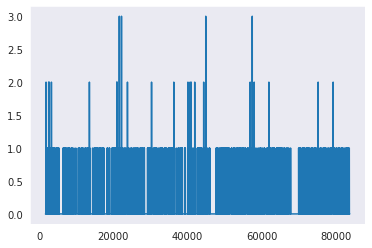

In [182]:
gws1['Goal Streak'].plot()

In [183]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.metrics import mean_absolute_error,mean_squared_error, explained_variance_score,r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler,Binarizer,scale

# X=gws1.drop(['name','total_points','ict_index','bps','goals_scored','assists','bonus','influence','minutes','threat','value','selected','creativity','own_goals','penalties_missed','penalties_saved','red_cards','yellow_cards','saves','selected','yellow_cards','clean_sheets','goals_conceded','home','id'],axis=1)
# #X=gws1[['Away Points','Home Points','Away Influence','Home Influence','Bonus Away','Assists Away','Bonus Home','Last_Week_Minutes_Played','Clean Sheets Away','Clean Sheets Home','Clean Sheets_90','Home Goals','Last_Week_ICT','Last_Week_BPS','Last_Week_Influence','Last_Week_Points','Assists Home','Last_Week_Selected','Last_Week_Value']]
# # ,'Last_2_Week_Points','Last_Week_Threat','Last_Week_Creativity','Points_90','Goals_90','Last_Week_Clean_Sheets','Last_Week_Goals_Conceded','Creativity Home','Creativity Away','streak','Influence_90']]
# y=gws1.total_points
# #binarizer = Binarizer(threshold=0.0).fit(X)
# #binaryX = binarizer.transform(X)
# #scalerX = MinMaxScaler(feature_range=(0, 1)).fit(X_train,y_train)

# X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=40)



# #scalerX = MinMaxScaler(feature_range=(0, 1)).fit(X_train)
# #X_train = scalerX.transform(X_train)
# #X_test = scalerX.transform(X_test)


In [184]:
from sklearn.decomposition import PCA 
  
# pca = PCA(n_components = 2) 
# X_train1 = pca.fit_transform(X_train) 
# X_test1 = pca.fit_transform(X_test) 
# # explained_variance = pca.explained_variance_ratio_ 
# # explained_variance


In [185]:
gws2=gws1.drop(['name','total_points','ict_index','bps','goals_scored','assists','bonus','influence','minutes','threat','value','selected','creativity','own_goals','penalties_missed','penalties_saved','red_cards','yellow_cards','saves','selected','yellow_cards','clean_sheets','goals_conceded','home','id'],axis=1)
from sklearn.preprocessing import StandardScaler
scale = MinMaxScaler()
scaled_data = scale.fit_transform(gws2)
scaled_data

array([[0.5       , 0.5       , 0.22857143, ..., 0.03842941, 0.        ,
        0.        ],
       [0.5       , 0.5       , 0.2       , ..., 0.06516291, 0.        ,
        0.        ],
       [0.        , 0.        , 0.2       , ..., 0.11779449, 0.        ,
        0.        ],
       ...,
       [0.5       , 1.        , 0.2       , ..., 0.19405657, 0.        ,
        0.        ],
       [0.        , 1.        , 0.17142857, ..., 0.16917293, 0.        ,
        0.        ],
       [1.        , 0.        , 0.22857143, ..., 0.16022198, 0.        ,
        0.        ]])

In [186]:
scaled_data.var()

0.055617840576551544

In [187]:
scaled_data = pd.DataFrame(scaled_data,columns=gws2.columns)
scaled_data.head(50)

,kickoff_time,fdr,Last_Week_Points,Last_2_Week_Points,Last_Week_Goals,Last_2_Week_Goals,Last_Week_ICT,Last_2_Week_ICT,Last_Week_BPS,Last_2_Week_BPS,Last_Week_Assists,Last_2_Week_Assists,Last_Week_Bonus,Last_2_Week_Bonus,Last_Week_Influence,Last_2_Week_Influence,Last_Week_Minutes_Played,Last_2_Week_Minutes_Played,Last_Week_Threat,Last_2_Week_Threat,Last_Week_Selected,Last_2_Week_Selected,Last_Week_Value,Last_2_Week_Value,Last_Week_Creativity,Last_2_Week_Creativity,Last_Week_FDR,Last_2_Week_FDR,Last_3_Week_FDR,Last_Week_Clean_Sheets,Last_2_Week_Clean_Sheets,Last_Week_Goals_Conceded,Last_2_Week_Goals_Conceded,Last_Week_Own_Goals,Last_2_Week_Own_Goals,Last_Week_Penalties_Missed,Last_2_Week_Penalties_Missed,Last_Week_Red_Cards,Last_2_Week_Red_Cards,Last_Week_Saves,Last_2_Week_Saves,Last_Week_Yellow_Cards,Last_2_Week_Yellow_Cards,Away,Home,Home Points,Away Points,Points_90,Value_Point,Assists_90,Goals_90,Influence_90,BPS_90,Home Influence,Away Influence,Home Goals,Clean Sheets_90,Goals_Conceded_90,Saves_90,Saves Home,Saves Away,Creativity Home,Creativity Away,Clean Sheets Home,Clean Sheets Away,Bonus Home,Bonus Away,ICT Home,ICT Away,Assists Home,Assists Away,Goal Streak,Assist Streak
0,0.5,0.5,0.228571,0.200000,0.00,0.00,0.064309,0.041801,0.240602,0.233083,0.000000,0.000000,0.000000,0.000000,0.088020,0.033007,1.000000,1.000000,0.021505,0.000000,0.003775,0.003209,0.153061,0.153061,0.011118,0.046226,0.0,1.0,1.0,0.0,0.0,0.111111,0.222222,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1.0,0.0,0.146667,0.079812,0.000000,0.311976,0.104377,0.000000,0.019583,0.019583,0.148421,0.051819,0.000,0.000000,0.022222,0.000000,0.000000,0.000000,0.047709,0.025657,0.000000,0.000000,0.000000,0.000000,0.084249,0.038429,0.000000,0.038429,0.0,0.0
1,0.5,0.5,0.200000,0.200000,0.00,0.00,0.022508,0.012862,0.187970,0.187970,0.000000,0.000000,0.000000,0.000000,0.034230,0.019560,0.344444,0.044444,0.000000,0.000000,0.001900,0.001945,0.183673,0.183673,0.009362,0.001755,1.0,0.5,0.5,0.0,0.0,0.111111,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,1.0,0.084444,0.183099,0.000000,0.310362,0.130435,0.000000,0.027717,0.027717,0.029825,0.093716,0.000,0.000000,0.017391,0.000000,0.000000,0.000000,0.006816,0.032987,0.000000,0.000000,0.000000,0.000000,0.015873,0.065163,0.000000,0.065163,0.0,0.0
2,0.0,0.0,0.200000,0.285714,0.00,0.00,0.016077,0.154341,0.157895,0.240602,0.000000,0.333333,0.000000,0.000000,0.000000,0.097800,0.288889,0.155556,0.021505,0.050251,0.010572,0.010087,0.387755,0.387755,0.014043,0.127560,0.5,0.5,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1.0,0.0,0.146667,0.154930,0.000000,0.308911,0.129187,0.000000,0.018355,0.018355,0.048947,0.051268,0.000,0.000000,0.021053,0.000000,0.000000,0.000000,0.071753,0.115761,0.000000,0.000000,0.000000,0.000000,0.086081,0.117794,0.166667,0.117794,0.0,0.0
3,0.5,0.5,0.200000,0.228571,0.00,0.00,0.009646,0.176849,0.165414,0.165414,0.000000,0.000000,0.000000,0.000000,0.000000,0.002445,0.088889,1.000000,0.021505,0.195980,0.015010,0.016164,0.224490,0.224490,0.000000,0.092452,0.0,0.5,0.0,0.0,0.0,0.111111,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1.0,0.0,0.146667,0.154930,0.000000,0.307174,0.129594,0.000000,0.014761,0.014761,0.038947,0.040794,0.000,0.000000,0.015957,0.000000,0.000000,0.000000,0.053010,0.085522,0.000000,0.000000,0.000000,0.000000,0.105311,0.144110,0.166667,0.144110,0.0,0.0
4,0.5,0.5,0.171429,0.171429,0.00,0.00,0.000000,0.000000,0.142857,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.060312,0.068781,0.081633,0.081633,0.000000,0.000000,0.0,0.5,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1.0,0.0,0.146667,0.154930,0.000000,0.305717,0.171717,0.066667,0.094167,0.094167,0.118947,0.124587,0.125,0.166667,0.011111,0.000000,0.000000,0.000000,0.031806,0.051313,0.000000,0.000000,0.200000,0.166667,0.097985,0.134085,0.000000,0.134085,0.0,0.0
5,0.5,1.0,0.200000,0.257143,0.00,0.00

In [188]:
from sklearn.model_selection import train_test_split
Y = gws1['total_points']
X_train,X_test,Y_train,Y_test=train_test_split(scaled_data,Y,test_size=0.3,random_state=123)

In [189]:
pca = PCA(n_components=73)
pca_model = pca.fit(X_train)

pca_train = pca_model.transform(X_train)
pca_train

array([[-7.40919632e-01, -5.45169382e-01, -2.45144689e-01, ...,
         7.37864882e-17, -3.18537263e-18, -1.97391442e-16],
       [ 6.90585097e-01, -7.73512762e-01,  8.93436576e-03, ...,
         8.98761633e-18,  4.98358341e-18, -1.16214747e-16],
       [ 6.58393281e-01, -8.48834074e-01, -1.26189325e-01, ...,
        -1.13560261e-17, -1.13971382e-18,  3.50904596e-17],
       ...,
       [ 6.67011579e-01, -8.04348220e-01,  4.52904857e-01, ...,
         2.12097254e-18, -4.50960015e-19,  9.97753015e-17],
       [ 6.77331043e-01, -7.52894522e-01, -9.46975222e-01, ...,
        -7.65728672e-18,  1.94576548e-18, -4.69814146e-17],
       [-6.66427546e-01,  6.62445064e-01,  6.03667990e-01, ...,
        -1.50752685e-17, -2.29138404e-18, -2.42876282e-18]])

In [190]:
scaled_data.columns

Index(['kickoff_time', 'fdr', 'Last_Week_Points', 'Last_2_Week_Points',
       'Last_Week_Goals', 'Last_2_Week_Goals', 'Last_Week_ICT',
       'Last_2_Week_ICT', 'Last_Week_BPS', 'Last_2_Week_BPS',
       'Last_Week_Assists', 'Last_2_Week_Assists', 'Last_Week_Bonus',
       'Last_2_Week_Bonus', 'Last_Week_Influence', 'Last_2_Week_Influence',
       'Last_Week_Minutes_Played', 'Last_2_Week_Minutes_Played',
       'Last_Week_Threat', 'Last_2_Week_Threat', 'Last_Week_Selected',
       'Last_2_Week_Selected', 'Last_Week_Value', 'Last_2_Week_Value',
       'Last_Week_Creativity', 'Last_2_Week_Creativity', 'Last_Week_FDR',
       'Last_2_Week_FDR', 'Last_3_Week_FDR', 'Last_Week_Clean_Sheets',
       'Last_2_Week_Clean_Sheets', 'Last_Week_Goals_Conceded',
       'Last_2_Week_Goals_Conceded', 'Last_Week_Own_Goals',
       'Last_2_Week_Own_Goals', 'Last_Week_Penalties_Missed',
       'Last_2_Week_Penalties_Missed', 'Last_Week_Red_Cards',
       'Last_2_Week_Red_Cards', 'Last_Week_Saves', 'Last_

In [191]:
Variable_Names =[
       'kickoff_time', 'fdr', 'Last_Week_Points', 'Last_2_Week_Points',
       'Last_Week_Goals', 'Last_2_Week_Goals', 'Last_Week_ICT',
       'Last_2_Week_ICT', 'Last_Week_BPS', 'Last_2_Week_BPS',
       'Last_Week_Assists', 'Last_2_Week_Assists', 'Last_Week_Bonus',
       'Last_2_Week_Bonus', 'Last_Week_Influence', 'Last_2_Week_Influence',
       'Last_Week_Minutes_Played', 'Last_2_Week_Minutes_Played',
       'Last_Week_Threat', 'Last_2_Week_Threat', 'Last_Week_Selected',
       'Last_2_Week_Selected', 'Last_Week_Value', 'Last_2_Week_Value',
       'Last_Week_Creativity', 'Last_2_Week_Creativity', 'Last_Week_FDR',
       'Last_2_Week_FDR', 'Last_3_Week_FDR', 'Last_Week_Clean_Sheets',
       'Last_2_Week_Clean_Sheets', 'Last_Week_Goals_Conceded',
       'Last_2_Week_Goals_Conceded', 'Last_Week_Own_Goals',
       'Last_2_Week_Own_Goals', 'Last_Week_Penalties_Missed',
       'Last_2_Week_Penalties_Missed', 'Last_Week_Red_Cards',
       'Last_2_Week_Red_Cards', 'Last_Week_Saves', 'Last_2_Week_Saves',
       'Last_Week_Yellow_Cards', 'Last_2_Week_Yellow_Cards', 'Away', 'Home',
       'Home Points', 'Away Points', 'Points_90', 'Value_Point', 'Assists_90',
       'Goals_90', 'Influence_90', 'BPS_90', 'Home Influence',
       'Away Influence', 'Home Goals', 'Clean Sheets_90', 'Goals_Conceded_90',
       'Saves_90', 'Saves Home', 'Saves Away', 'Creativity Home',
       'Creativity Away', 'Clean Sheets Home', 'Clean Sheets Away',
       'Bonus Home', 'Bonus Away', 'ICT Home', 'ICT Away', 'Assists Home',
       'Assists Away', 'Goal Streak', 'Assist Streak'] 
Matrix = pd.DataFrame(pca_model.components_,columns=Variable_Names)
Matrix1 = np.transpose(Matrix)
Matrix1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72
kickoff_time,-0.003325,-0.000026,-0.020320,0.000011,-0.007097,0.008836,-0.012286,-0.010891,-0.022616,-0.136777,-0.989637,-0.009625,0.012547,-0.009108,-0.007663,0.005494,-0.000651,-0.008695,0.000253,-0.001458,-0.001442,0.000596,0.000933,-0.000110,-0.003353,-0.003108,-0.004435,0.002284,0.001882,-0.001632,0.000781,0.000676,0.000136,0.000104,0.000476,-0.000231,-0.002952,0.000759,-0.000862,-0.000268,0.001033,0.000096,0.000827,0.001099,0.001306,0.001580,-0.000898,0.000083,-0.000833,-0.000434,-0.000502,-0.000290,-0.000094,0.000152,-0.000246,-0.000368,-0.000434,-0.000155,-0.000073,0.000313,-0.000289,-0.000426,0.000110,-0.000115,0.000175,0.000083,0.000038,0.000027,-2.377741e-06,-2.949417e-06,0.000000e+00,0.000000e+00,0.000000e+00
fdr,-0.004124,-0.001383,0.234656,0.601778,-0.582813,0.490387,-0.045531,-0.015238,0.011947,-0.003554,0.004653,-0.008553,-0.003432,0.004759,0.002892,-0.001476,0.000981,0.000597,-0.001579,0.000838,-0.000182,0.002428,-0.000260,0.000563,0.001148,0.000777,0.002085,-0.001477,-0.000864,0.001137,0.000506,0.001127,0.000357,-0.001434,0.000462,-0.000398,-0.000435,0.000368,-0.000748,0.000158,-0.000901,-0.000473,-0.000808,0.000320,-0.000423,0.001106,-0.000968,-0.000191,-0.000272,0.000128,0.000022,0.000328,-0.000032,0.000256,0.000094,-0.000208,0.000114,-0.000006,-0.000027,-0.000229,0.000224,0.000090,0.000181,0.000079,0.000076,0.000018,0.000005,-0.000022,1.851994e-05,-7.733144e-06,1.921503e-17,4.051800e-18,6.559014e-18
Last_Week_Points,0.006195,0.068162,0.003731,-0.000048,0.003284,0.009754,0.090951,0.052056,0.025713,0.005118,-0.003870,-0.032224,0.053298,0.091521,0.177322,0.016566,-0.012553,-0.022774,-0.031156,0.060492,-0.008360,0.065645,0.042921,-0.009217,0.066389,-0.053314,0.014644,-0.041772,0.074854,-0.208884,-0.072680,0.028389,-0.059691,-0.053661,-0.005829,0.018074,0.157048,-0.014187,0.041007,0.020081,-0.083148,0.032784,-0.069099,-0.001517,0.059873,0.011878,0.022003,-0.169905,-0.274444,-0.350900,0.032523,0.217736,0.138616,-0.096689,-0.183874,0.009088,0.007372,0.105865,-0.506982,0.452183,-0.036288,0.005523,-0.015705,0.006434,-0.003406,-0.000594,-0.000706,-0.000184,-3.246804e-03,1.880953e-03,-2.166240e-16,-1.238461e-16,1.428450e-15
Last_2_Week_Points,0.001428,0.070874,-0.005208,-0.000121,-0.001227,-0.007046,-0.078090,0.061464,0.022344,-0.017475,-0.000157,-0.023848,-0.051525,0.178978,-0.096986,0.022335,-0.012334,-0.023208,-0.023750,0.015177,0.062775,-0.052678,0.037936,0.012858,0.111236,-0.051813,0.004668,-0.025753,0.057161,0.209735,-0.091736,0.043268,-0.065222,-0.050970,0.004998,-0.029931,0.173938,0.021984,0.071587,-0.020654,-0.077402,-0.035021,0.023983,0.004683,-0.094409,0.014119,0.055249,-0.059588,-0.275905,0.354525,0.015893,0.218276,-0.183090,-0.067517,-0.120287,0.083902,0.032940,0.270901,0.481623,0.415152,-0.015075,0.001419,-0.004473,0.004307,0.001746,0.000851,0.000917,-0.000658,-1.904370e-03,-3.424495e-03,2.552361e-16,1.229465e-16,3.570482e-16
Last_Week_Goals,0.002585,0.022786,-0.001042,-0.000122,0.001677,0.002092,0.027497,0.025751,0.065904,-0.020075,-0.001245,0.001053,0.036733,0.084036,0.175331,-0.004403,-0.002972,-0.048404,0.046565,-0.039161,0.183244,0.208507,-0.133247,0.065316,0.125904,-0.011950,-0.052355,-0.121685,0.137333,-0.313562,-0.066866,0.101337,-0.049298,0.037536,0.045980,0.016867,0.260686,0.098156,0.112402,0.053912,-0.122357,0.061752,-0.106820,0.197297,0.218941,0.091555,0.030133,-0.017191,0.185778,0.048174,-0.021901,0.323470,0.355577,-0.110602,0.135996,-0.084660,0.000679,-0.053434,0.305864,-0.232970,0.017132,0.001574,0.012465,-0.007622,0.006810,0.000643,-0.000783,0.001705,-3.568286e-04,1.470638e-04,1.324187e-16,1.133217e-16,-4.498482e-16
Last_2_Week_Goals,-0.000019,0.025147,-0.002288,-0.001932,-0.001032,-0.002711,-0.022619,0.029961,0.070152,0.003770,-0.004655,0.007003,-0.028443,0.174896,-0.102072,0.0032

In [192]:
pca_model.explained_variance_

array([5.00573337e-01, 4.90631241e-01, 1.85268706e-01, 1.84617124e-01,
       1.81130007e-01, 1.39341274e-01, 1.22491234e-01, 1.04403084e-01,
       8.64177103e-02, 7.47827649e-02, 6.95041901e-02, 6.14671743e-02,
       5.63479036e-02, 3.71818080e-02, 3.57997001e-02, 2.76686044e-02,
       1.92383172e-02, 1.31138964e-02, 1.10134381e-02, 8.63976618e-03,
       7.99650858e-03, 7.66603685e-03, 6.37814784e-03, 5.98039275e-03,
       5.32024217e-03, 4.88153730e-03, 4.53713513e-03, 4.28278667e-03,
       3.42679902e-03, 3.07738043e-03, 2.70532004e-03, 2.41930260e-03,
       2.34123445e-03, 2.26350819e-03, 2.18598057e-03, 2.10007515e-03,
       2.05190536e-03, 1.87993898e-03, 1.67607628e-03, 1.57068974e-03,
       1.48325485e-03, 1.32402482e-03, 1.22951332e-03, 1.21700088e-03,
       1.16313327e-03, 1.12430471e-03, 1.03242804e-03, 8.63764808e-04,
       5.76833403e-04, 4.83066082e-04, 4.61012867e-04, 4.41892835e-04,
       4.23287480e-04, 3.50571719e-04, 3.04706383e-04, 2.99034932e-04,
      

In [193]:

var = pca_model.explained_variance_ratio_
var

array([2.00357018e-01, 1.96377644e-01, 7.41547398e-02, 7.38939406e-02,
       7.24982045e-02, 5.57720521e-02, 4.90277380e-02, 4.17878640e-02,
       3.45891271e-02, 2.99321811e-02, 2.78194048e-02, 2.46025484e-02,
       2.25535343e-02, 1.48822073e-02, 1.43290116e-02, 1.10744993e-02,
       7.70023409e-03, 5.24890359e-03, 4.40818450e-03, 3.45811026e-03,
       3.20064314e-03, 3.06837015e-03, 2.55288604e-03, 2.39368254e-03,
       2.12945392e-03, 1.95386007e-03, 1.81601136e-03, 1.71420710e-03,
       1.37159369e-03, 1.23173713e-03, 1.08281807e-03, 9.68338141e-04,
       9.37090968e-04, 9.05980640e-04, 8.74949814e-04, 8.40565736e-04,
       8.21285532e-04, 7.52455115e-04, 6.70858036e-04, 6.28676538e-04,
       5.93680281e-04, 5.29947655e-04, 4.92118944e-04, 4.87110777e-04,
       4.65549995e-04, 4.50008664e-04, 4.13234564e-04, 3.45726247e-04,
       2.30880497e-04, 1.93349651e-04, 1.84522739e-04, 1.76869850e-04,
       1.69422962e-04, 1.40318110e-04, 1.21960276e-04, 1.19690249e-04,
      

Text(0, 0.5, 'Cumulative Proportion of Variance Explained')

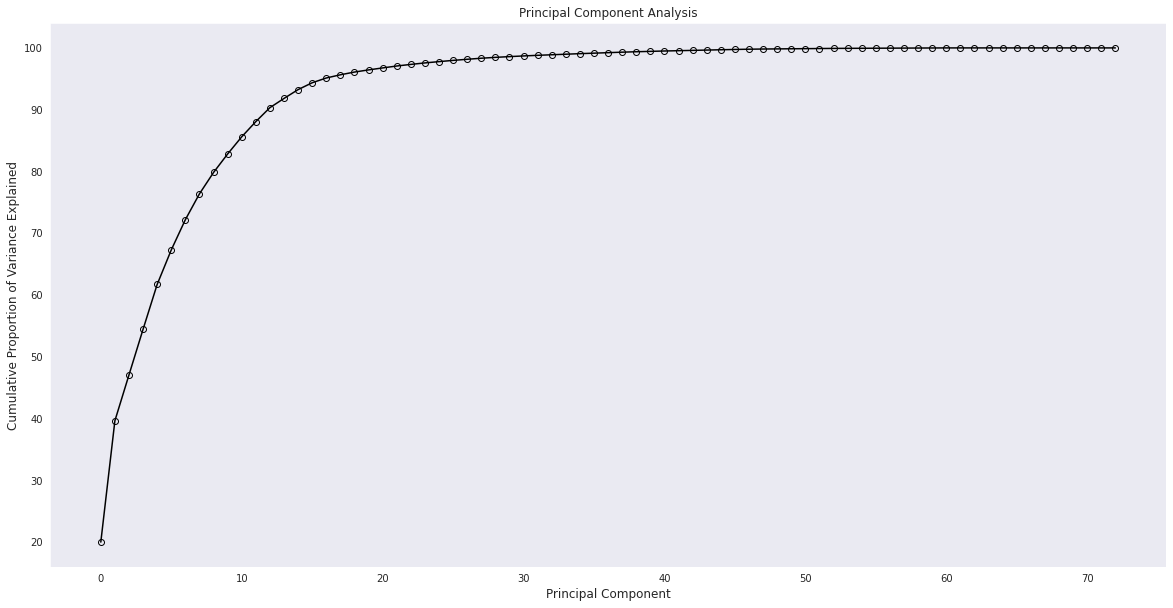

In [194]:

cumulative_var = np.cumsum(np.round(var, decimals=4)*100)
plt.figure(figsize=(20,10))
plt.plot(cumulative_var,'k-o',markerfacecolor='None',markeredgecolor='k')
plt.title('Principal Component Analysis',fontsize=12)
plt.xlabel("Principal Component",fontsize=12)
plt.ylabel("Cumulative Proportion of Variance Explained",fontsize=12)

In [195]:

pca_train = pd.DataFrame(pca_train,columns=['PC_' + str(i) for i in range(1, 74)])
pca_train.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16,PC_17,PC_18,PC_19,PC_20,PC_21,PC_22,PC_23,PC_24,PC_25,PC_26,PC_27,PC_28,PC_29,PC_30,PC_31,PC_32,PC_33,PC_34,PC_35,PC_36,PC_37,PC_38,PC_39,PC_40,PC_41,PC_42,PC_43,PC_44,PC_45,PC_46,PC_47,PC_48,PC_49,PC_50,PC_51,PC_52,PC_53,PC_54,PC_55,PC_56,PC_57,PC_58,PC_59,PC_60,PC_61,PC_62,PC_63,PC_64,PC_65,PC_66,PC_67,PC_68,PC_69,PC_70,PC_71,PC_72,PC_73
0,-0.740920,-0.545169,-0.245145,0.488783,-0.444264,0.111981,0.022627,0.309033,0.562939,-0.082464,-0.469992,0.136609,0.003401,-0.213233,-0.062598,-0.081758,0.162978,-0.051921,-0.105136,-0.156428,-0.219945,-0.102433,-0.111957,-0.024734,-0.073582,-0.052983,0.009101,-0.083764,0.092457,0.000387,-0.121578,-0.006206,0.005761,0.017237,-0.042459,0.001204,0.045656,0.030059,-0.061455,-0.012700,0.003387,0.006799,0.024347,0.021532,0.018821,-0.047957,0.094705,-0.008670,0.008642,-0.001305,-0.005016,-0.013431,0.000730,0.031394,-0.003833,0.002723,-0.005617,0.000147,-0.000671,-0.007524,-0.001040,-0.001442,0.000319,-0.002001,-0.000171,0.000760,-0.000029,-0.000265,-8.044144e-06,-0.000008,7.378649e-17,-3.185373e-18,-1.973914e-16
1,0.690585,-0.773513,0.008934,0.488138,0.494795,0.093504,-0.024245,0.056213,-0.067655,0.000882,0.025762,-0.052820,-0.007186,-0.038104,-0.018994,0.345813,-0.049146,-0.029943,-0.019319,0.231914,0.139733,-0.046549,-0.102204,-0.043112,-0.088827,0.110598,-0.009134,0.086446,0.009781,-0.013552,-0.088335,0.156572,0.060705,0.034395,-0.042894,-0.008740,-0.018793,-0.012252,0.019451,-0.001378,-0.040282,0.006020,0.007256,0.003640,-0.001384,-0.035624,-0.025848,0.000312,0.001751,0.001308,-0.009863,-0.007219,0.000671,0.007399,-0.008054,0.009737,-0.002821,0.002510,-0.001202,-0.006342,0.001785,0.002931,0.000519,-0.000019,-0.000114,-0.000796,0.000185,0.000017,-4.278001e-08,0.000009,8.987616e-18,4.983583e-18,-1.162147e-16
2,0.658393,-0.848834,-0.126189,-0.005575,-0.495570,-0.408977,0.048707,0.005032,-0.178127,0.019098,0.027813,-0.054586,-0.005771,0.102357,0.029010,0.142505,0.153165,0.051760,-0.082885,0.050543,0.065986,-0.004134,-0.051278,-0.024080,-0.055352,0.051006,-0.006572,0.057603,-0.068524,-0.010281,-0.013048,0.314868,0.087522,0.039926,-0.042828,0.000765,0.032918,0.011924,-0.035134,-0.003709,0.078166,-0.006925,0.004105,-0.025400,0.007077,-0.015551,-0.030292,-0.000846,-0.017993,-0.000575,-0.015417,0.008575,-0.001955,0.003146,-0.006271,0.006552,0.004256,0.000299,-0.000790,-0.005964,0.000141,0.006696,0.000392,-0.000397,0.000249,0.008337,-0.000204,-0.000020,1.583674e-05,0.000020,-1.135603e-17,-1.139714e-18,3.509046e-17
3,-0.723418,-0.322756,0.575367,-0.369803,-0.141209,0.107475,-0.119519,-0.222817,-0.039680,0.298835,-0.523152,0.552530,0.630898,0.224708,-0.100621,-0.035627,0.136406,-0.027818,-0.141545,0.042318,0.029103,-0.123256,-0.099771,0.080797,0.234158,0.069758,0.202175,-0.046397,-0.024481,0.043336,0.032146,-0.001193,-0.013740,-0.010196,0.018600,-0.016587,-0.000198,-0.001365,0.013862,-0.004427,-0.023270,0.006247,0.011849,-0.016262,-0.007015,-0.004115,0.008558,-0.007823,0.006695,-0.001047,0.013089,0.009198,-0.021477,0.001594,-0.020226,-0.008094,0.004594,0.013187,0.015680,0.021774,-0.003242,-0.005622,0.003328,-0.000674,0.001049,0.000731,0.000893,-0.000349,-2.364568e-04,-0.000925,9.781783e-18,-1.082125e-17,4.735800e-17
4,0.701025,-0.204425,-0.593244,0.366619,0.126018,0.075459,-0.115718,-0.082801,0.129380,0.121978,0.017807,-0.067949,-0.103955,0.029953,-0.005849,-0.073168,-0.015144,0.125845,-0.052349,-0.002026,0.238841,-0.058319,0.096402,-0.069210,-0.068812,-0.075027,-0.054278,0.099340,-0.074131,-0.120758,0.042599,-0.055018,-0.010879,-0.002543,0.012104,-0.146841,-0.019846,0.010442,-0.014589,-0.013005,-0.010567,-0.026013,0.005722,-0.019533,0.040513,0.002584,-0.021230,-0.003991,-0.036521,0.003249,-0.000798,-0.022884,0.010907,0.043665,0.000590,0.003569,-0.000161,-0.003586,-0.001275,-0.003328,0.000244,0.000820,-0.001712,-0.002002,-0.000807,-0.000788,-0.000722,0.000078,-1.325163e-04,-0.000765,5.854377e-17,3.329266e-17,8.111216

In [196]:

Y_train1 = Y_train.reset_index()
 
pca_train1 = pd.concat([pca_train,Y_train1],axis=1)
pca_train2 = pca_train1.drop(columns='index')
pca_train3 = pca_train1[['PC_1', 'PC_2', 'PC_3', 'PC_4', 'PC_5', 'PC_6', 'PC_7','PC_8','PC_9','PC_10','total_points']]
# pca_train3 = pca_train1[['PC_1', 'PC_2', 'PC_3', 'PC_4', 'PC_5', 'PC_6', 'PC_7','PC_8','PC_9','PC_10','PC_11', 'PC_12', 'PC_13', 'PC_14', 'PC_15', 'PC_16', 'PC_17','PC_18','PC_19','PC_20','PC_21', 'PC_22', 'PC_23', 'PC_24', 'PC_25', 'PC_26', 'PC_27','PC_28','PC_29','PC_30','PC_31', 'PC_32', 'PC_33', 'PC_34', 'PC_35', 'PC_36', 'PC_37','PC_38','PC_39','PC_40','total_points']]

In [197]:

pca_train_X = pca_train3[['PC_1', 'PC_2', 'PC_3', 'PC_4', 'PC_5', 'PC_6', 'PC_7','PC_8','PC_9','PC_10']]
# pca_train_X = pca_train3[['PC_1', 'PC_2', 'PC_3', 'PC_4', 'PC_5', 'PC_6', 'PC_7','PC_8','PC_9','PC_10','PC_11', 'PC_12', 'PC_13', 'PC_14', 'PC_15', 'PC_16', 'PC_17','PC_18','PC_19','PC_20','PC_21', 'PC_22', 'PC_23', 'PC_24', 'PC_25', 'PC_26', 'PC_27','PC_28','PC_29','PC_30','PC_31', 'PC_32', 'PC_33', 'PC_34', 'PC_35', 'PC_36', 'PC_37','PC_38','PC_39','PC_40']]


pca_train_X.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10
0,-0.740920,-0.545169,-0.245145,0.488783,-0.444264,0.111981,0.022627,0.309033,0.562939,-0.082464
1,0.690585,-0.773513,0.008934,0.488138,0.494795,0.093504,-0.024245,0.056213,-0.067655,0.000882
2,0.658393,-0.848834,-0.126189,-0.005575,-0.495570,-0.408977,0.048707,0.005032,-0.178127,0.019098
3,-0.723418,-0.322756,0.575367,-0.369803,-0.141209,0.107475,-0.119519,-0.222817,-0.039680,0.298835
4,0.701025,-0.204425,-0.593244,0.366619,0.126018,0.075459,-0.115718,-0.082801,0.129380,0.121978


In [198]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso,SGDRegressor
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
import statsmodels.api as sm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedKFold



#model=RandomForestRegressor()
#model=GradientBoostingRegressor()
#model=Lasso()
#model=Ridge()
#model=LinearRegression()
#model=sm.OLS(X_train,y_train)
#model=SGDRegressor(eta0=0.0001)
model=LGBMRegressor()

# k_fold = KFold(n_splits=5)
# for train_indices, test_indices in k_fold.split(X):
#    print('Train: %s | test: %s' % (train_indices, test_indices))
 
# [model.fit(X_train, y_train).score(X_test, y_test)
# for train, test in k_fold.split(X)]
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, scaled_data, Y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
#print(n_scores)
print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))
# fit the model on the whole dataset
#model = GradientBoostingRegressor()
model.fit(pca_train_X, Y_train)


MAE: -1.450 (0.018)


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [199]:
pca_test = pca.transform(X_test)
pca_test

array([[-6.85346914e-01,  8.02444714e-01, -4.97244745e-01, ...,
         4.23295343e-17,  2.59140641e-18,  4.53179284e-18],
       [ 6.63862654e-01, -8.44631056e-01, -7.26166946e-01, ...,
         2.24926126e-17, -8.18269172e-19,  1.35253123e-16],
       [ 7.11311993e-01,  2.07076816e-01, -5.58390813e-02, ...,
        -3.22150869e-18, -3.92689727e-17, -1.33247965e-16],
       ...,
       [-7.23911151e-01, -7.36685183e-01,  5.97399060e-01, ...,
         8.51898923e-18,  3.65186167e-18, -7.99727129e-17],
       [ 6.70565503e-01, -8.20200324e-01,  5.94372662e-01, ...,
         3.55831668e-18,  5.15720524e-18,  3.49829050e-17],
       [ 6.92382461e-01, -8.06587244e-01,  2.44915803e-01, ...,
        -9.99688399e-18,  6.64087938e-18, -1.86634877e-17]])

In [200]:
pca_test = pd.DataFrame(pca_test,columns=['PC_' + str(i) for i in range(1, 74)])
Y_test1 = Y_test.reset_index()
pca_test1 = pd.concat([pca_test,Y_test1],axis=1)
pca_test1 = pca_test1.drop(columns='index')
pca_test2 = pca_test1[['PC_1', 'PC_2', 'PC_3', 'PC_4', 'PC_5', 'PC_6', 'PC_7','PC_8','PC_9','PC_10','total_points']]
# pca_test2 = pca_test1[['PC_1', 'PC_2', 'PC_3', 'PC_4', 'PC_5', 'PC_6', 'PC_7','PC_8','PC_9','PC_10','PC_11', 'PC_12', 'PC_13', 'PC_14', 'PC_15', 'PC_16', 'PC_17','PC_18','PC_19','PC_20','PC_21', 'PC_22', 'PC_23', 'PC_24', 'PC_25', 'PC_26', 'PC_27','PC_28','PC_29','PC_30','PC_31', 'PC_32', 'PC_33', 'PC_34', 'PC_35', 'PC_36', 'PC_37','PC_38','PC_39','PC_40','total_points']]

pca_test2.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,total_points
0,-0.685347,0.802445,-0.497245,-0.102051,0.125984,-0.436534,-0.448406,0.147912,-0.444825,-0.354030,6
1,0.663863,-0.844631,-0.726167,-0.417753,-0.089718,-0.149464,0.037033,0.019791,-0.142852,-0.045934,1
2,0.711312,0.207077,-0.055839,-0.768950,0.233815,0.265036,-0.998024,0.481082,-0.191745,0.075183,2
3,0.671820,-0.605414,-0.015163,-0.492464,-0.528007,0.100378,0.121213,-0.053897,-0.062078,-0.162196,1
4,-0.663455,1.527650,0.068017,-0.505869,-0.024036,-0.412085,-0.201856,0.450967,1.963940,-0.179462,13


In [201]:
# pca_test_X = pca_test2[['PC_1', 'PC_2', 'PC_3', 'PC_4', 'PC_5', 'PC_6', 'PC_7','PC_8','PC_9','PC_10','PC_11', 'PC_12', 'PC_13', 'PC_14', 'PC_15', 'PC_16', 'PC_17','PC_18','PC_19','PC_20','PC_21', 'PC_22', 'PC_23', 'PC_24', 'PC_25', 'PC_26', 'PC_27','PC_28','PC_29','PC_30','PC_31', 'PC_32', 'PC_33', 'PC_34', 'PC_35', 'PC_36', 'PC_37','PC_38','PC_39','PC_40']]
pca_test_X = pca_test2[['PC_1', 'PC_2', 'PC_3', 'PC_4', 'PC_5', 'PC_6', 'PC_7','PC_8','PC_9','PC_10']]


pca_test_X.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10
0,-0.685347,0.802445,-0.497245,-0.102051,0.125984,-0.436534,-0.448406,0.147912,-0.444825,-0.354030
1,0.663863,-0.844631,-0.726167,-0.417753,-0.089718,-0.149464,0.037033,0.019791,-0.142852,-0.045934
2,0.711312,0.207077,-0.055839,-0.768950,0.233815,0.265036,-0.998024,0.481082,-0.191745,0.075183
3,0.671820,-0.605414,-0.015163,-0.492464,-0.528007,0.100378,0.121213,-0.053897,-0.062078,-0.162196
4,-0.663455,1.527650,0.068017,-0.505869,-0.024036,-0.412085,-0.201856,0.450967,1.963940,-0.179462


In [202]:
predict1 = model.predict(pca_test_X)
predict1

array([2.31703713, 0.15265981, 1.11258519, ..., 0.56720131, 0.40106086,
       0.40277468])

In [203]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# vif = pd.DataFrame()
# vif["VIF Factor"] = [variance_inflation_factor(scaled_data.values, i) for i in range(scaled_data.shape[1])]
# vif["features"] = scaled_data.columns
# #vif.to_csv('/content/drive/My Drive/vif.csv')

In [204]:
#X_test_o=pca.inverse_transform(X_test)
# predict=model.predict(pca_test_X)
df=pd.DataFrame({'Actual':Y_test,'Predicted':predict1.round(),'Error':(Y_test-predict1).round()})
df.head(50)

,Actual,Predicted,Error
14636,6,2.0,4.0
75740,1,0.0,1.0
51942,2,1.0,1.0
5004,1,1.0,0.0
7146,13,6.0,7.0
6040,0,2.0,-2.0
35472,1,1.0,-0.0
75846,0,0.0,-0.0
8998,5,1.0,4.0
12888,6,4.0,2.0


In [205]:
print(df['Error'].min())
print(df['Error'].max())
print(df['Error'].mean())

-8.0
20.0
-0.007536606373815676


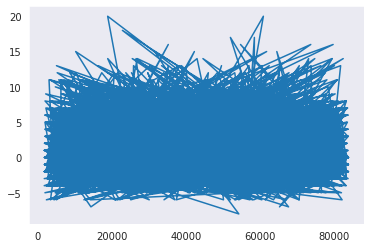

In [206]:
df['Error'].plot()

In [207]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, explained_variance_score,r2_score,classification_report
print('MAE:',mean_absolute_error(Y_test,predict1))
print('MSE:',mean_squared_error(Y_test,predict1))
print('RMSE',np.sqrt(mean_squared_error(Y_test,predict1)))
print('R2 Score',r2_score(Y_test,predict1))


MAE: 1.485553134911779
MSE: 5.427326061149203
RMSE 2.3296622203978847
R2 Score 0.23435287774369984


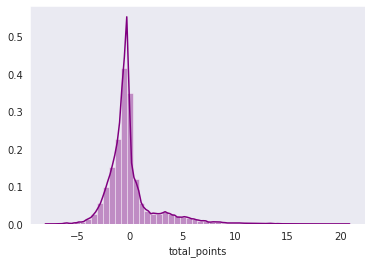

In [208]:
sns.distplot(Y_test-predict1,color='purple',kde=True)

In [209]:
# def percentage_error(actual, predicted):
#     res = np.empty(actual.shape)
#     for j in range(actual.shape[0]):
#         if actual[j] != 0:
#             res[j] = (actual[j] - predicted[j]) / actual[j]
#         else:
#             res[j] = predicted[j] / np.mean(actual)
#     return res

# def mean_absolute_percentage_error(y_true, y_pred): 
#     return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100


In [210]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.isfinite(((y_true) - y_pred) / (y_true))) * 100

# from sklearn.utils import check_arrays
# def mean_absolute_percentage_error(y_true, y_pred): 
#     y_true, y_pred = check_arrays(y_true, y_pred)

#     ## Note: does not handle mix 1d representation
#     #if _is_1d(y_true): 
#     #    y_true, y_pred = _check_1d_array(y_true, y_pred)

#     return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [211]:
error1=mean_absolute_percentage_error(Y_test, predict1)
error1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning:

divide by zero encountered in true_divide



55.647071490094746

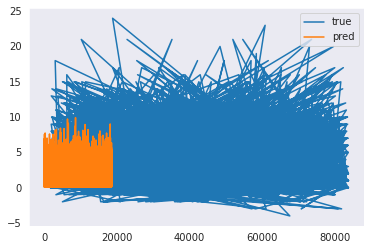

In [212]:
plt.plot(Y_test)
plt.plot(predict1)
plt.legend(["true", "pred"])
plt.show()

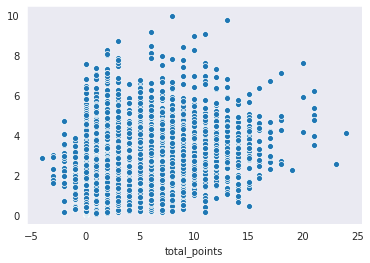

In [213]:
sns.scatterplot(x=Y_test,y=predict1)

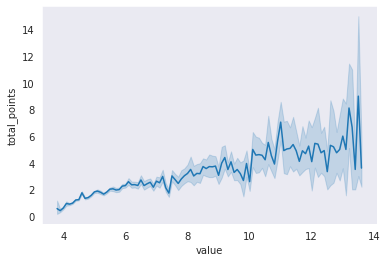

In [214]:
sns.lineplot(x='value',y='total_points',data=gws1)